# ***Part B***

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

cols = [
    "Cement",
    "BlastFurnaceSlag",
    "FlyAsh",
    "Water",
    "Superplasticizer",
    "CoarseAggregate",
    "FineAggregate",
    "Age",
    "ConcreteCompressiveStrength"
]

df = df = pd.read_csv("Concrete_Data.csv", 
                 header=None,        
                 skiprows=1,    
                 names=cols,         
                 encoding="latin1")
X = df.drop("ConcreteCompressiveStrength", axis=1)
y = df["ConcreteCompressiveStrength"]

### ***Correlation Analysis***

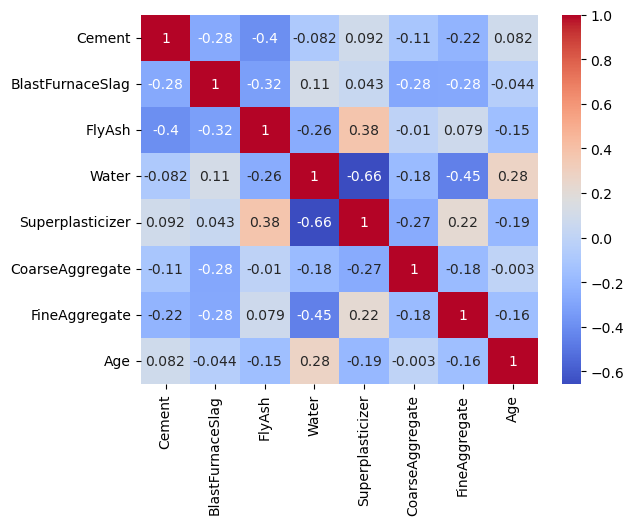

In [2]:
import seaborn as sns, matplotlib.pyplot as plt
sns.heatmap(X.corr(), annot=True, cmap="coolwarm")
plt.show()

### ***Untransformed Linear Regression Model***

In [3]:
# untransformed
x_test = X[501:631]
y_test = y[501:631]
x_train = np.concatenate((X[:501], X[631:]), axis=0)
y_train = np.concatenate((y[:501], y[631:]), axis=0)

X_with_const = sm.add_constant(x_train)          
model_raw = sm.OLS(y_train, X_with_const).fit()
print(model_raw.summary())

y_train_pred = model_raw.fittedvalues
mse_train = np.mean((y_train - y_train_pred) ** 2)
r2_train = 1 - mse_train / np.var(y_train)
print(f"Train MSE: {mse_train:.3f}, Train R²: {r2_train:.3f}")

x_test_const = sm.add_constant(x_test)
y_pred_test = model_raw.predict(x_test_const)
mse_test = np.mean((y_test - y_pred_test) ** 2)
r2_test = 1 - mse_test / np.var(y_test)
print(f"Test MSE: {mse_test:.3f}, Test R²: {r2_test:.3f}")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     184.9
Date:                Wed, 15 Oct 2025   Prob (F-statistic):          1.80e-183
Time:                        20:52:04   Log-Likelihood:                -3367.7
No. Observations:                 900   AIC:                             6753.
Df Residuals:                     891   BIC:                             6797.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -52.0353     28.768     -1.809      0.0

### ***Normalized Linear Regression Model***

In [4]:
# normalized
X_norm = (X - X.min()) / (X.max() - X.min())

x_test = X_norm[501:631]
y_test = y[501:631]
x_train = np.concatenate((X_norm[:501], X_norm[631:]), axis=0)
y_train = np.concatenate((y[:501], y[631:]), axis=0)

X_norm_const = sm.add_constant(x_train)
model_norm = sm.OLS(y_train, X_norm_const).fit()
print(model_norm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     184.9
Date:                Wed, 15 Oct 2025   Prob (F-statistic):          1.80e-183
Time:                        20:52:04   Log-Likelihood:                -3367.7
No. Observations:                 900   AIC:                             6753.
Df Residuals:                     891   BIC:                             6797.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.4013      9.020     -1.264      0.2

### ***Log transformed Linear Regression Model***

In [5]:
# log transformed
X_log = np.log1p(X)      

x_test = X_log[501:631]
y_test = y[501:631]
x_train = np.concatenate((X_log[:501], X_log[631:]), axis=0)
y_train = np.concatenate((y[:501], y[631:]), axis=0)

X_log_const = sm.add_constant(x_train)
model_log = sm.OLS(y_train, X_log_const).fit()
print(model_log.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     441.4
Date:                Wed, 15 Oct 2025   Prob (F-statistic):          8.62e-304
Time:                        20:52:04   Log-Likelihood:                -3087.1
No. Observations:                 900   AIC:                             6192.
Df Residuals:                     891   BIC:                             6235.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         79.8197     75.982      1.051      0.2

### ***Tables & Figures for Part D***

In [6]:
features = [
    "Cement",
    "BlastFurnaceSlag",
    "FlyAsh",
    "Water",
    "Superplasticizer",
    "CoarseAggregate",
    "FineAggregate",
    "Age"
]

pvals_raw = model_raw.pvalues[1:]
pvals_norm = model_norm.pvalues[1:]
pvals_log = model_log.pvalues[1:]

pval_table = pd.DataFrame({
    "Predictor": features,
    "p-Value (Raw)": pvals_raw,
    "p-Value (Normalized)": pvals_norm,
    "p-Value (Log)": pvals_log,
})

pval_table = pval_table.round(3)
display(pval_table)

,Predictor,p-Value (Raw),p-Value (Normalized),p-Value (Log)
0,Cement,0.000,0.000,0.000
1,BlastFurnaceSlag,0.000,0.000,0.000
2,FlyAsh,0.000,0.000,0.261
3,Water,0.002,0.002,0.000
4,Superplasticizer,0.246,0.246,0.000
5,CoarseAggregate,0.005,0.005,0.408
6,FineAggregate,0.003,0.003,0.095
7,Age,0.000,0.000,0.000
